In [26]:
import sys
import cv2
import re
import csv
from PIL import Image

from skimage.feature import peak_local_max

from skspatial.objects import Points, Plane
from skspatial.plotting import plot_3d

from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

sys.path.append('..')

In [27]:
%matplotlib notebook
import math as m
import numpy as np
from scipy import ndimage
from scipy.optimize import lsq_linear

import matplotlib
import matplotlib.pyplot as plt

from core import Core

from global_var import COLORS


In [28]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [19]:
folder = r'C:\SPRUP_data_Jenda\2019_03_13_Jenda_microscopy\20_12_11_BC5/'.replace('\\', '/')

file = 'raw_02_1'


core = Core(folder, file)
core.downsample(5)
core.type = 'diff'
print(len(core))

99


In [20]:
folder = r'D:\SPRUP_data_Jenda\21_02_26_BC_sem/'.replace('\\', '/')
file = 'raw_01_2'

# folder = r'D:\SPRUP_data_Jenda\2020_02_05_interferences/'.replace('\\', '/')
# file = 'raw_07_1'

data = np.load(folder + 'saved_data/' + file + '.npy')
# mask = data>0.1
# data[mask] = 1
# data = data.astype(int)

In [21]:
f = 263
# f = 464
# f = 554
f = 50

d =data[:,:,f]
print(data.shape)

(273, 1099, 1439)


<IPython.core.display.Javascript object>


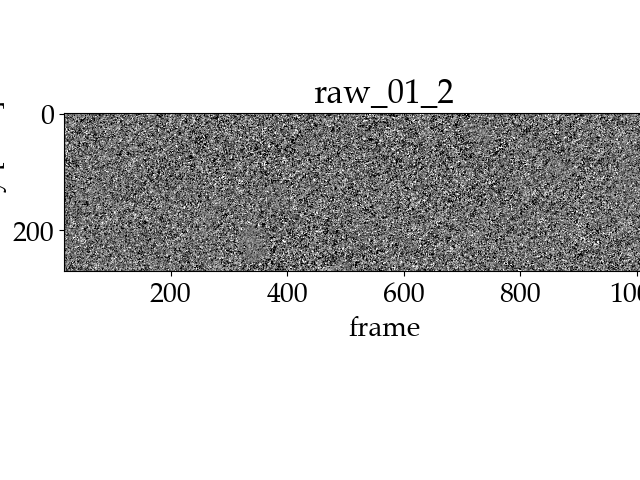

In [22]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.set_title(file)
axes.set_xlabel('frame')
axes.set_ylabel('intensity [a. u.]')


axes.imshow(
    d,
    cmap='gray',
    zorder=0,
    vmin=np.min(d)*0.2,
    vmax=np.max(d)*0.2
)

In [23]:
std = np.std(data[:, :, 50:] , axis = 2)
std*=1e5

<IPython.core.display.Javascript object>


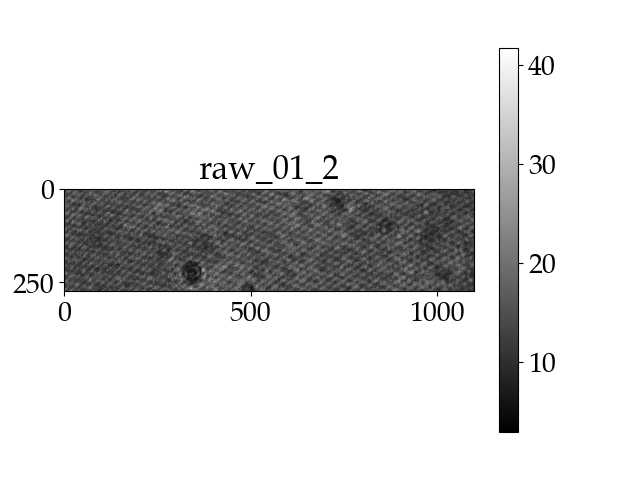

In [35]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_title(file)
# axes.set_xlabel('frame')
# axes.set_ylabel('intensity [a. u.]')


img = axes.imshow(
    std,
    cmap='gray',
    zorder=0,

)
cb = fig.colorbar(img, ax=axes)


current = img.get_array()

current = (current - img.get_clim()[0]) / (img.get_clim()[1] - img.get_clim()[0]) * 256
current = current.astype(np.uint8)

pilimage = Image.fromarray(current)
pilimage.convert("L")

pilimage.save('images/std_sem.png' + '.png', 'png')

# fig.savefig('images/std_sem.png', dpi=300, bbox_inches='tight')    
# fig.savefig('images/std_direct_bs.png', dpi=300, bbox_inches='tight') 

In [68]:
for i in range(10):
    print('{}, {:.1f}: {:.2f}'.format(i/10, 1-i/10, i/10*(1-i/10)))

0.0, 1.0: 0.00
0.1, 0.9: 0.09
0.2, 0.8: 0.16
0.3, 0.7: 0.21
0.4, 0.6: 0.24
0.5, 0.5: 0.25
0.6, 0.4: 0.24
0.7, 0.3: 0.21
0.8, 0.2: 0.16
0.9, 0.1: 0.09
